In [51]:
!pip install lightgbm

  Using cached lightgbm-3.3.2-py3-none-win_amd64.whl (1.0 MB)


In [120]:
!pip install catboost

  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.model_selection import KFold 


ModuleNotFoundError: No module named 'catboost'

In [67]:
train = pd.read_csv('https://raw.githubusercontent.com/yashXmehra/Hackathron/main/train_0OECtn8.csv')
test = pd.read_csv('https://raw.githubusercontent.com/yashXmehra/Hackathron/main/test_KEUNoE1_MzIdO6t.csv')
sub = pd.read_csv("https://raw.githubusercontent.com/yashXmehra/Hackathron/main/sample_submission_JPlpRcN.csv")

In [68]:
train.shape, test.shape

((89197, 10), (11121, 9))

In [69]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [70]:
train.dtypes

row_id                int64
user_id               int64
category_id           int64
video_id              int64
age                   int64
gender               object
profession           object
followers             int64
views                 int64
engagement_score    float64
dtype: object

In [71]:
test.dtypes

row_id          int64
user_id         int64
category_id     int64
video_id        int64
age             int64
gender         object
profession     object
followers       int64
views           int64
dtype: object

In [72]:
train.isnull().sum(),test.isnull().sum()

(row_id              0
 user_id             0
 category_id         0
 video_id            0
 age                 0
 gender              0
 profession          0
 followers           0
 views               0
 engagement_score    0
 dtype: int64,
 row_id         0
 user_id        0
 category_id    0
 video_id       0
 age            0
 gender         0
 profession     0
 followers      0
 views          0
 dtype: int64)

In [73]:
train["user_id"].value_counts()

5198     10
13218    10
1448     10
13410    10
7157     10
         ..
21507     2
4404      2
21430     2
17541     2
11279     2
Name: user_id, Length: 27734, dtype: int64

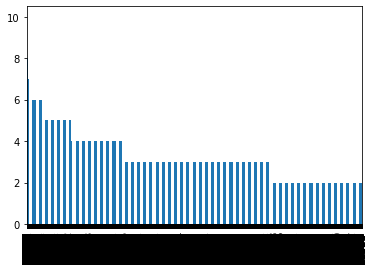

In [74]:
train['user_id'].value_counts().plot(kind='bar');

In [75]:
train.profession.value_counts()

Student                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64

<AxesSubplot:>

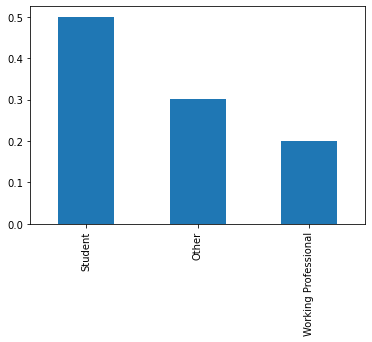

In [76]:
train["profession"].value_counts(normalize = True).plot(kind="bar")

In [77]:
train["category_id"].value_counts()

5     8104
8     6313
25    4880
19    4679
21    4043
12    3889
11    3766
4     3678
34    3297
16    3264
13    2777
32    2712
23    2671
18    2241
42    2178
15    2164
9     1886
7     1885
31    1855
3     1845
1     1810
6     1399
39    1339
28    1309
10    1217
17    1208
26    1156
27    1103
36    1025
43    1019
35     986
37     962
29     916
20     702
30     548
41     545
14     536
38     534
24     524
33     517
40     458
22     366
46     236
45     227
44     214
2      167
47      47
Name: category_id, dtype: int64

In [78]:
train["video_id"].value_counts()

112    1337
53     1334
1      1282
65     1103
42     1077
       ... 
165      78
171      78
174      70
166      66
175      47
Name: video_id, Length: 175, dtype: int64

**Getting unique values as well as what the data looks for a particular category**


In [79]:
train[train['user_id']==2]
# number of videos user has watched

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
23213,23214,2,4,7,28,Female,Working Professional,230,781,2.65
25590,25591,2,3,5,28,Female,Working Professional,270,621,3.50
63785,63786,2,4,8,28,Female,Working Professional,230,781,2.85
64557,64558,2,4,6,28,Female,Working Professional,230,781,2.76
69848,69849,2,3,4,28,Female,Working Professional,270,621,3.65


In [80]:
train[train['video_id']==8]

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
133,134,14777,4,8,32,Female,Other,230,781,3.40
150,151,16103,4,8,22,Male,Student,230,781,4.31
193,194,12946,4,8,13,Female,Student,230,781,2.48
640,641,27134,4,8,15,Female,Student,230,781,2.48
641,642,232,4,8,20,Male,Student,230,781,4.14
...,...,...,...,...,...,...,...,...,...,...
88436,88437,13857,4,8,44,Female,Working Professional,230,781,1.96
88513,88514,15886,4,8,29,Female,Working Professional,230,781,1.84
88929,88930,5950,4,8,39,Female,Other,230,781,2.48
89055,89056,19673,4,8,22,Male,Student,230,781,4.11


In [81]:
train[train['category_id']==4] 
# total 47 different categories. In each category, we have different video_ids

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
22,23,5513,4,99,55,Female,Working Professional,230,781,1.71
62,63,21891,4,6,28,Female,Other,230,781,1.95
133,134,14777,4,8,32,Female,Other,230,781,3.40
150,151,16103,4,8,22,Male,Student,230,781,4.31
193,194,12946,4,8,13,Female,Student,230,781,2.48
...,...,...,...,...,...,...,...,...,...,...
89114,89115,3126,4,6,31,Male,Other,230,781,3.95
89128,89129,9239,4,99,20,Female,Student,230,781,3.44
89130,89131,24999,4,7,18,Male,Student,230,781,4.29
89165,89166,14809,4,64,20,Male,Student,230,781,4.89


In [82]:
(train.groupby('video_id').mean()['views']%1>0).sum()

1

In [83]:
train.groupby(['video_id','category_id']).mean()

row_id       user_id        age  followers  views  \
video_id category_id                                                            
1        1            42795.375635  13245.671743  25.818951      360.0  990.0   
         19           44635.714906  13870.041968  24.923300      230.0  369.0   
2        1            45288.278135  13938.191318  24.797428      360.0  990.0   
3        2            43794.520958  13672.988024  24.652695      220.0   30.0   
4        3            44598.611588  13711.336910  25.271459      270.0  621.0   
...                            ...           ...        ...        ...    ...   
171      46           41985.923077  15654.961538  26.012821      190.0  840.0   
172      5            45320.889610  14787.844156  23.844156      240.0  229.0   
173      46           44916.587500  15019.550000  23.875000      190.0  840.0   
174      44           48145.571429  14105.757143  25.000000      210.0  636.0   
175      47           45724.085106  14730.574468  24.702128      260.0  248.0   

                      engagement_score  
video_id category_id                    
1        1                    3.514399  
         19                   3.593517  
2        1                    3.659534  
3        2                    3.830419  
4        3                    3.957747  
...                                ...  
171      46                   3.371538  
172      5                    3.461883  
173      46                   3.119125  
174      44                   3.292429  
175      47                   3.690851  

[176 rows x 6 columns]

In [84]:
train[train.video_id==1]
# this video_id where we have 2 categories.

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
41,42,26687,1,1,25,Male,Other,360,990,3.99
96,97,9311,19,1,26,Female,Other,230,369,3.04
174,175,26268,1,1,18,Female,Student,360,990,2.60
176,177,341,1,1,20,Male,Student,360,990,4.33
198,199,6065,1,1,29,Male,Student,360,990,3.83
...,...,...,...,...,...,...,...,...,...,...
88725,88726,2346,1,1,15,Male,Student,360,990,4.33
88749,88750,4940,1,1,38,Male,Other,360,990,3.89
88886,88887,20371,19,1,27,Male,Other,230,369,3.78
89129,89130,2259,1,1,20,Male,Student,360,990,4.31


In [85]:
train.groupby('category_id').nunique()['video_id'].head(20)

category_id
1      3
2      1
3      2
4      5
5     31
6      2
7      3
8     10
9      3
10     4
11     6
12     6
13     5
14     1
15     3
16     5
17     2
18     3
19     7
20     2
Name: video_id, dtype: int64

In [86]:
train[(train['video_id']==1)&(train['category_id']==19)].shape,test[(test['video_id']==1)&(test['category_id']==19)].shape

((691, 10), (165, 9))

In [87]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [88]:
test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [89]:
#Label Encode gender and profession
combine = [train,test]
gender_mapping = {"Male": 1, "Female": 2}
for dataset in combine:
    dataset['gender'] = dataset['gender'].map(gender_mapping).astype(int)
profession_mapping = {"Student": 1, "Other": 2, "Working Professional": 3}
for dataset in combine:
    dataset['profession'] = dataset['profession'].map(profession_mapping).astype(int)

In [90]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.transform(test['gender'])

train['profession'] = le.fit_transform(train['profession'])
test['profession'] = le.transform(test['profession'])

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

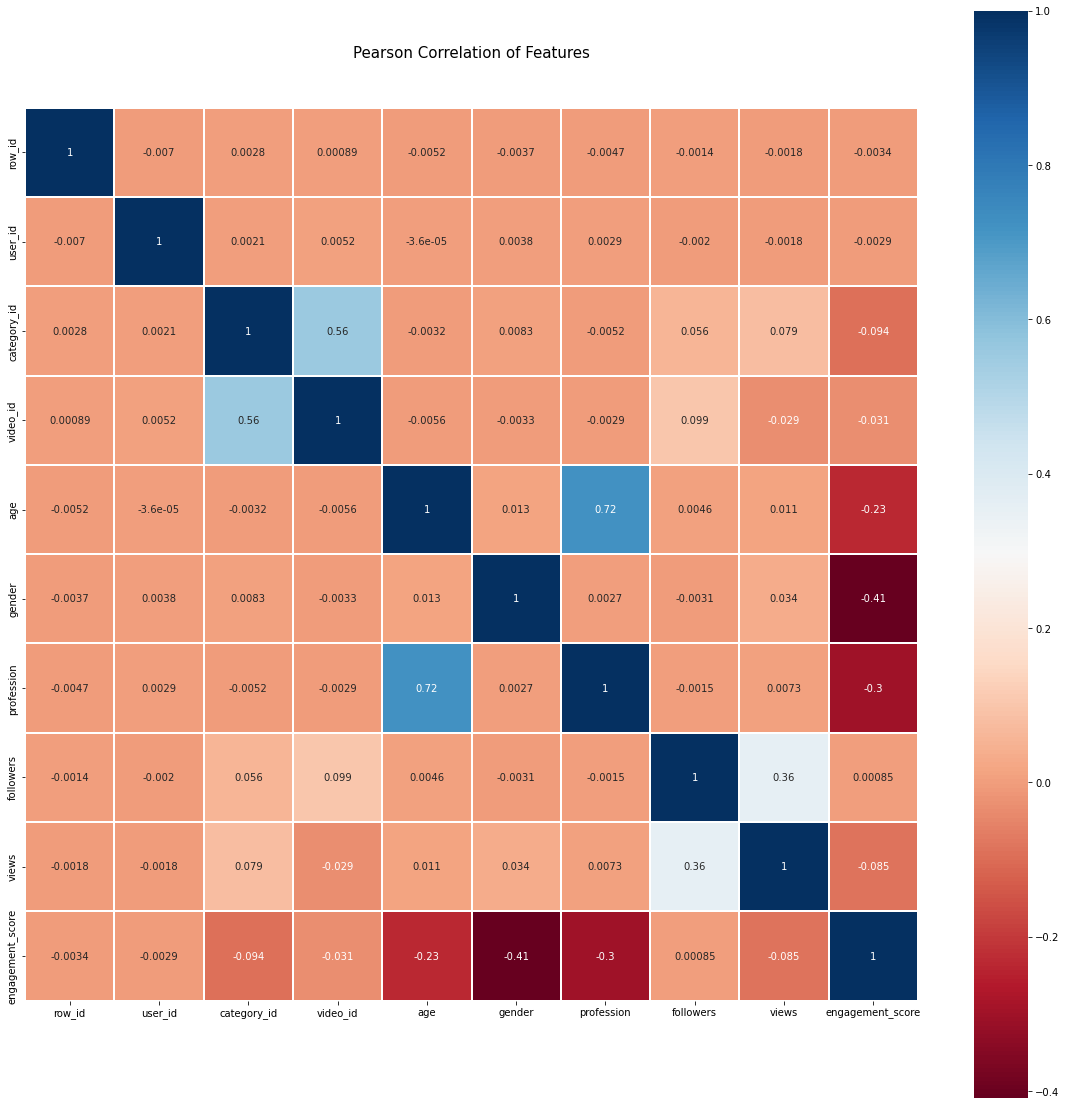

In [91]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [104]:
vidtrain = train[(train['video_id']==1)&(train['category_id']==19)]
vidtest = test[(test['video_id']==1)&(test['category_id']==19)]

In [105]:
train = train.drop(vidtrain.index)
test = test.drop(vidtest.index)

train.reset_index(inplace=True)
test.reset_index(inplace=True)

vidtrain.reset_index(inplace=True)
vidtest.reset_index(inplace=True)

In [106]:
vidtrain['video_id']=176
vidtest['video_id']=176

In [107]:
train = pd.concat([train,vidtrain]).sort_values(by='row_id').reset_index().drop(columns=['level_0','index'])
test = pd.concat([test,vidtest]).sort_values(by='row_id').reset_index().drop(columns=['level_0','index'])

In [108]:
train[(train['video_id']==1)&(train['category_id']==19)].shape,test[(test['video_id']==1)&(test['category_id']==19)].shape

((0, 17), (0, 16))

In [109]:
train['vpf'] = train['views']/train['followers']
test['vpf'] = test['views']/test['followers']

In [110]:
train['moreview'] = [1 if i>=1 else 0 for i in train['vpf']]
test['moreview'] = [1 if i>=1 else 0 for i in test['vpf']]

In [111]:
train['bin'] = pd.cut(train['age'],[0,10,15,20,25,30,35,50,70])
test['bin'] = pd.cut(test['age'],[0,10,15,20,25,30,35,50,70])

In [112]:
train['bin'].value_counts()

(15, 20]    22167
(20, 25]    15647
(30, 35]    13202
(25, 30]    12878
(10, 15]    12496
(35, 50]    11600
(0, 10]       752
(50, 70]      455
Name: bin, dtype: int64

In [113]:
train.engagement_score.mean()

3.487797011110046

In [114]:
def target(df,df_test,cols):
    for col in cols:
        new_col = col + '_tenc'
        df[new_col] = df[col]
        mean = df.groupby(col).mean()['engagement_score']
        df[new_col] = [mean[i] for i in df[new_col]] 
        df_test[new_col] = [mean[i]*0.75 + 3.487797011110046*0.25 for i in df_test[col]] 

In [115]:
target(train,test,['user_id','category_id','video_id','bin'])
#'gender','profession'

In [116]:
def target_two(df,df_test,col1,col2):
        new_col = col1 + col2 + '_tenc'
        df[new_col] = df[col1]
        mean = df.groupby([col1,col2]).mean()['engagement_score']
        
        df[new_col] = [mean[df.loc[i][col1]][df.loc[i][col2]] for i in range(df.shape[0])] 
        df_test[new_col] = [mean[df_test.loc[i][col1]][df_test.loc[i][col2]]*0.75 + 3.487797011110046*0.25 for i in range(df_test.shape[0])] 



In [117]:
target_two(train,test,'user_id','category_id')
target_two(train,test,'user_id','moreview')

In [118]:
# removing useless columns
train.drop(columns=['user_id','category_id','video_id','age','bin','moreview'],inplace=True) 
test.drop(columns=['user_id','category_id','video_id','age','bin','moreview'],inplace=True)

In [119]:
# Kfold validation 
from sklearn.model_selection import KFold
def make_folds(train_df):
    
    kf = KFold(n_splits=10)
    for f,(t_,v_) in enumerate(kf.split(X=train_df)):
            train_df.loc[v_,'kfold'] = f     
    return train_df
train = make_folds(train)

In [121]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.transform(test['gender'])

train['profession'] = le.fit_transform(train['profession'])
test['profession'] = le.transform(test['profession'])

In [150]:
from sklearn.metrics import r2_score

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

models ={ 'xgb':XGBRegressor,# Best Performing Model
    'lgbm':LGBMRegressor,
    'cat':CatBoostRegressor,
    'rf':RandomForestRegressor}
RandomForestRegressor.fit(train_fold_pred,test_pred)

TypeError: fit() missing 1 required positional argument: 'y'

In [144]:
train_fold_pred = np.zeros((train.shape[0], 1)) 
test_pred = np.zeros((test.shape[0], 10))
print(train_fold_pred.shape)
print(test_pred.shape)

(89197, 1)
(11121, 10)


In [145]:
col = list(train.drop(columns=['row_id','engagement_score','kfold']).columns)
score =[]
col

['gender',
 'profession',
 'followers',
 'views',
 'vpf',
 'user_id_tenc',
 'category_id_tenc',
 'video_id_tenc',
 'bin_tenc',
 'user_idcategory_id_tenc',
 'user_idmoreview_tenc']

In [146]:
def run_folds(df,test_df,fold,model):

    df_train = df[df.kfold!=fold].reset_index(drop=True)
    df_valid = df[df.kfold==fold].reset_index(drop=True)
    
    x_train = df_train.drop(columns=['row_id','engagement_score','kfold'],axis=1)
    y_train = df_train.engagement_score.values
    
    x_valid = df_valid.drop(columns=['row_id','engagement_score','kfold'],axis=1)
    y_valid = df_valid.engagement_score.values
    
    reg = models[model]
    
    #x_train = pd.DataFrame(scale.fit_transform(x_train),columns=x_train.columns)
    #x_valid = pd.DataFrame(scale.transform(x_valid),columns=x_valid.columns)
    
    print('*'*12,'SKFold', i+1, '*'*12)
    reg.fit(x_train, y_train)
    print('*'*12,'SKFold', i+1,'End', '*'*12)
    
    pred_y = reg.predict(x_valid)
    score.append(r2_score(y_valid, pred_y ))
    
    #train_fold_pred[df_valid.index, :] = pred_y.reshape(-1, 1)
    test_pred[:, i] = reg.predict(test_df[col])

In [147]:
for i in range(10):
    run_folds(train,test,i,'xgb')
    print('Done!')
print(np.mean(score))

************ SKFold 1 ************


TypeError: fit() missing 1 required positional argument: 'y'

In [ ]:
df = pd.DataFrame(test_pred)
df['mean']=df.mean(axis=1)
df.head()